<a href="https://colab.research.google.com/github/WagnerLopesCardozo/Analise_de_Algoritmos_e_Estrutura_de_Dados/blob/main/Wagner_LopesCardozoSemin%C3%A1rio1_Compara%C3%A7%C3%A3oAlgoritmosAulasPassadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

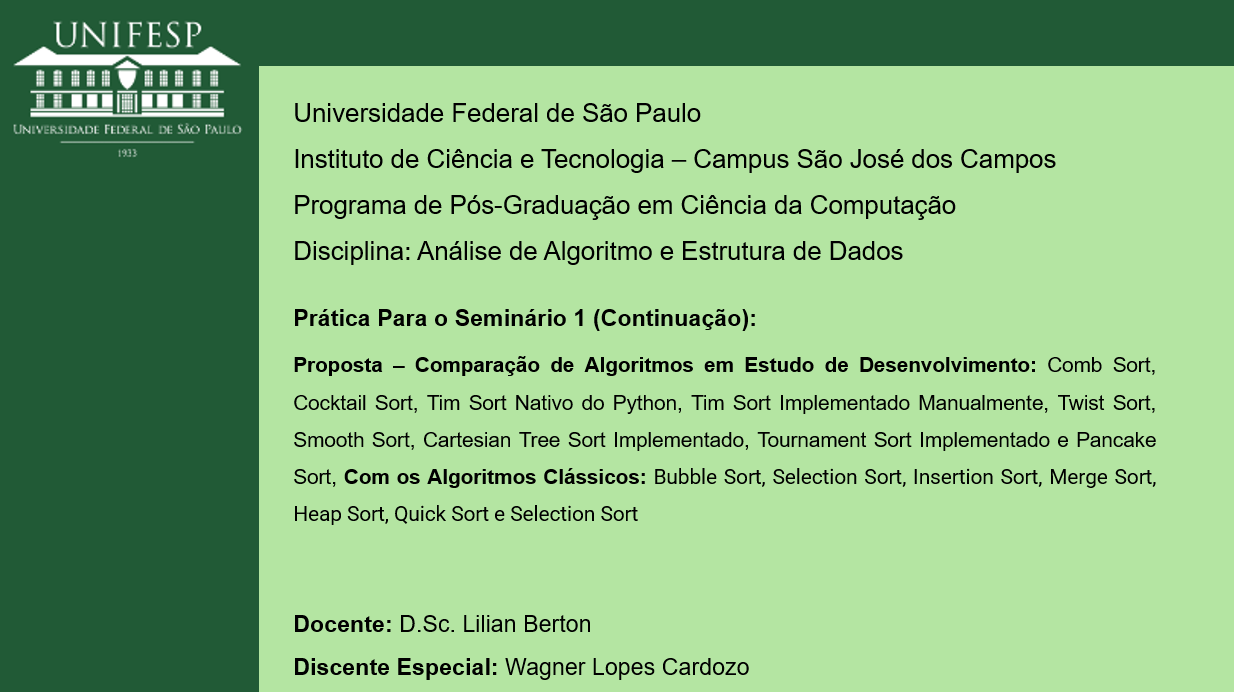

#<font color=lightgreen>Introdução

##Este estudo tem por objetivo comparar o tempo gato e a memória usada para ordenar um vetor desordenado aleatoriamente, onde todos os algoritmos inicialmente solicitam ao usuário a quantidade de elementos que deseja colocar no vetor desornedado. Em seguida o algoritmo informa os 10 primeiros elementos e os 10 últimos elementos do vetor desordenado aleatóriamente e confirma a quantidade de elementos escolida pelo usuário.

##Em tempo rela quando os algoritmos estão em execuçao, vão exibindo na tela o vetor ordenado de forma crescente e decrescente mostrando os 10 primeiros e 10 últimos elementos do vetor ordenado e o tempo gasto e memória usada para ordenar cada vetor e ao final o algoritmo exibe na tela um sumário em forma de tabela com os resultado das comparações dos algoritmos mais classicos já estudados com os algoritmos ainda em pesquisa.

#<font color=lightgreen>Algoritmos ainda em pesquisa:

* Comb Sort

* Cocktail Sort

* Tim Sort (nativo do Python)

* Tim Sort (implementado manualmente)

* Twist Sort

* Smooth Sort

* Cartesian Tree Sort

* Tournament Sort

* Pancake Sort

#<font color=lightgreen>Algoritmos Clássicos:

* Bubble Sort

* Selection Sort

* Insertion Sort

* Merge Sort

* Heap Sort

* Quick Sort

* Selection Sort



#<font color=lightgreen>Comb Sort

* Complexidade no pior caso: O(n²)

* Algoritmo clássico comparável: Bubble Sort e Selection Sort


In [ ]:
import time
import psutil
import os
from tabulate import tabulate
import random

# Função para medir o uso de memória em bytes
def memory_usage_psutil():
    process = psutil.Process(os.getpid())
    mem = process.memory_info().rss  # Retorna o uso de memória em bytes
    return mem

# Função para gerar um vetor aleatório
def generate_vector(size):
    return [random.randint(0, 10000) for _ in range(size)]

# Função para exibir os primeiros e últimos 10 elementos de um vetor
def display_vector_info(vec, desc=False):
    if desc:
        vec = vec[::-1]
    print(f"10 primeiros elementos: {vec[:10]}")
    print(f"10 últimos elementos: {vec[-10:]}")

# Função para ordenar usando Bubble Sort
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr

# Função para ordenar usando Selection Sort
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

# Função para ordenar usando Comb Sort
def comb_sort(arr):
    gap = len(arr)
    shrink = 1.3
    sorted = False
    while gap > 1 or not sorted:
        gap = int(gap / shrink)
        if gap < 1:
            gap = 1
        sorted = True
        for i in range(len(arr) - gap):
            if arr[i] > arr[i + gap]:
                arr[i], arr[i + gap] = arr[i + gap], arr[i]
                sorted = False
    return arr

# Função para medir o tempo de execução e a memória usada por um algoritmo
def measure_algorithm(algorithm, arr):
    start_time = time.perf_counter()
    start_mem = memory_usage_psutil()

    sorted_arr = algorithm(arr.copy())

    end_time = time.perf_counter()
    end_mem = memory_usage_psutil()

    execution_time = end_time - start_time
    memory_used = end_mem - start_mem

    return sorted_arr, execution_time, memory_used

# Função principal para comparar os algoritmos
def main():
    size = int(input("Digite o número de elementos do vetor: "))
    vector = generate_vector(size)

    print(f"\nVetor desordenado com {size} elementos:")
    display_vector_info(vector)

    algorithms = [
        ("Bubble Sort", bubble_sort, "O(n^2)"),
        ("Selection Sort", selection_sort, "O(n^2)"),
        ("Comb Sort", comb_sort, "O(n log n)")
    ]

    results = []

    for name, algo, complexity in algorithms:
        print(f"\nExecutando {name}...")
        sorted_asc, time_asc, mem_asc = measure_algorithm(algo, vector)

        print(f"Vetor ordenado de forma crescente:")
        display_vector_info(sorted_asc)
        print(f"Tempo gasto: {time_asc:.4f} segundos")
        print(f"Memória usada: {mem_asc} bytes")

        # Ordenar o vetor em ordem decrescente
        sorted_desc = sorted_asc[::-1]
        # Medir tempo e memória para vetor ordenado decrescente
        sorted_desc, time_desc, mem_desc = measure_algorithm(algo, sorted_desc)

        print(f"Vetor ordenado de forma decrescente:")
        display_vector_info(sorted_desc, desc=True)
        print(f"Tempo gasto: {time_desc:.4f} segundos")
        print(f"Memória usada: {mem_desc} bytes")

        results.append([name, complexity,
                        f"{time_asc:.4f}", f"{mem_asc}",
                        f"{time_desc:.4f}", f"{mem_desc}"])

    # Exibindo tabela de resultados
    headers = ["Algoritmo", "Complexidade Assintótica",
               "Tempo Crescente (s)", "Memória Crescente (bytes)",
               "Tempo Decrescente (s)", "Memória Decrescente (bytes)"]

    print("\nTabela de Resultados:")
    print(tabulate(results, headers=headers, tablefmt="grid"))

if __name__ == "__main__":
    main()


Digite o número de elementos do vetor: 10000

Vetor desordenado com 10000 elementos:
10 primeiros elementos: [611, 5951, 1151, 8735, 9900, 3124, 3155, 949, 9070, 3656]
10 últimos elementos: [1758, 1039, 246, 9740, 5133, 4633, 7610, 9475, 3075, 2483]

Executando Bubble Sort...
Vetor ordenado de forma crescente:
10 primeiros elementos: [0, 0, 0, 1, 3, 4, 4, 4, 5, 8]
10 últimos elementos: [9990, 9991, 9993, 9994, 9995, 9996, 9997, 9997, 9997, 9998]
Tempo gasto: 11.3979 segundos
Memória usada: 0 bytes
Vetor ordenado de forma decrescente:
10 primeiros elementos: [9998, 9997, 9997, 9997, 9996, 9995, 9994, 9993, 9991, 9990]
10 últimos elementos: [8, 5, 4, 4, 4, 3, 1, 0, 0, 0]
Tempo gasto: 15.2149 segundos
Memória usada: 0 bytes

Executando Selection Sort...
Vetor ordenado de forma crescente:
10 primeiros elementos: [0, 0, 0, 1, 3, 4, 4, 4, 5, 8]
10 últimos elementos: [9990, 9991, 9993, 9994, 9995, 9996, 9997, 9997, 9997, 9998]
Tempo gasto: 5.6764 segundos
Memória usada: 0 bytes
Vetor ordenado

#<font color=lightgreen>Cocktail Sort

* Complexidade no pior caso: O(n²)

* Algoritmo clássico comparável: Insertion Sort e Bubble Sort.


In [ ]:
import time
import psutil
import os
from tabulate import tabulate
import random

# Função para medir o uso de memória em bytes
def memory_usage_psutil():
    process = psutil.Process(os.getpid())
    mem = process.memory_info().rss  # Retorna o uso de memória em bytes
    return mem

# Função para gerar um vetor aleatório
def generate_vector(size):
    return [random.randint(0, 10000) for _ in range(size)]

# Função para exibir os primeiros e últimos 10 elementos de um vetor
def display_vector_info(vec, desc=False):
    if desc:
        vec = vec[::-1]
    print(f"10 primeiros elementos: {vec[:10]}")
    print(f"10 últimos elementos: {vec[-10:]}")

# Função para ordenar usando Bubble Sort
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr

# Função para ordenar usando Insertion Sort
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

# Função para ordenar usando Cocktail Sort
def cocktail_sort(arr):
    n = len(arr)
    start = 0
    end = n - 1
    swapped = True
    while swapped:
        swapped = False
        for i in range(start, end):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
        if not swapped:
            break
        swapped = False
        end -= 1
        for i in range(end, start - 1, -1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
        start += 1
    return arr

# Função para medir o tempo de execução e a memória usada por um algoritmo
def measure_algorithm(algorithm, arr):
    start_time = time.time()
    start_mem = memory_usage_psutil()

    sorted_arr = algorithm(arr.copy())

    end_time = time.time()
    end_mem = memory_usage_psutil()

    execution_time = end_time - start_time
    memory_used = end_mem - start_mem

    return sorted_arr, execution_time, memory_used

# Função principal para comparar os algoritmos
def main():
    size = int(input("Digite o número de elementos do vetor: "))
    vector = generate_vector(size)

    print(f"Vetor desordenado com {size} elementos:")
    display_vector_info(vector)

    algorithms = [("Bubble Sort", bubble_sort),
                  ("Insertion Sort", insertion_sort),
                  ("Cocktail Sort", cocktail_sort)]

    results = []

    for name, algo in algorithms:
        print(f"\nExecutando {name}...")
        sorted_asc, time_asc, mem_asc = measure_algorithm(algo, vector)

        print(f"Vetor ordenado de forma crescente:")
        display_vector_info(sorted_asc)
        print(f"Tempo gasto: {time_asc:.4f} segundos")
        print(f"Memória usada: {mem_asc} bytes")

        # Ordenar o vetor em ordem decrescente
        sorted_desc = sorted_asc[::-1]
        # Medir tempo e memória para vetor ordenado decrescente
        sorted_desc, time_desc, mem_desc = measure_algorithm(algo, sorted_desc)

        print(f"Vetor ordenado de forma decrescente:")
        display_vector_info(sorted_desc, desc=True)
        print(f"Tempo gasto: {time_desc:.4f} segundos")
        print(f"Memória usada: {mem_desc} bytes")

        results.append([name, "O(n^2)" if name != "Cocktail Sort" else "O(n)",
                        f"{time_asc:.4f}", f"{mem_asc}",
                        f"{time_desc:.4f}", f"{mem_desc}"])

    # Exibindo tabela de resultados
    headers = ["Algoritmo", "Complexidade Assintótica",
               "Tempo Crescente (s)", "Memória Crescente (bytes)",
               "Tempo Decrescente (s)", "Memória Decrescente (bytes)"]

    print("\nTabela de Resultados:")
    print(tabulate(results, headers=headers, tablefmt="grid"))

if __name__ == "__main__":
    main()


Digite o número de elementos do vetor: 10000
Vetor desordenado com 10000 elementos:
10 primeiros elementos: [5805, 2865, 3797, 1200, 6360, 1154, 8789, 6734, 8959, 5428]
10 últimos elementos: [9744, 2275, 6824, 8322, 1906, 5758, 6625, 4472, 2107, 3969]

Executando Bubble Sort...
Vetor ordenado de forma crescente:
10 primeiros elementos: [0, 1, 2, 7, 7, 9, 9, 10, 12, 12]
10 últimos elementos: [9992, 9992, 9993, 9994, 9995, 9996, 9996, 9997, 9999, 10000]
Tempo gasto: 11.4522 segundos
Memória usada: 0 bytes
Vetor ordenado de forma decrescente:
10 primeiros elementos: [10000, 9999, 9997, 9996, 9996, 9995, 9994, 9993, 9992, 9992]
10 últimos elementos: [12, 12, 10, 9, 9, 7, 7, 2, 1, 0]
Tempo gasto: 15.1466 segundos
Memória usada: 0 bytes

Executando Insertion Sort...
Vetor ordenado de forma crescente:
10 primeiros elementos: [0, 1, 2, 7, 7, 9, 9, 10, 12, 12]
10 últimos elementos: [9992, 9992, 9993, 9994, 9995, 9996, 9996, 9997, 9999, 10000]
Tempo gasto: 4.5859 segundos
Memória usada: 0 bytes


#<font color=lightgreen>Tim Sort (Nativo do Python)

* Complexidade no pior caso: O (n Log ⁡n)

* Algoritmo clássico comparável: Merge Sort e Heap Sort


In [ ]:
import time
import psutil
import os
from tabulate import tabulate
import random
import heapq

# Função para medir o uso de memória em bytes
def memory_usage_psutil():
    process = psutil.Process(os.getpid())
    mem = process.memory_info().rss  # Retorna o uso de memória em bytes
    return mem

# Função para gerar um vetor aleatório
def generate_vector(size):
    return [random.randint(0, 10000) for _ in range(size)]

# Função para exibir os primeiros e últimos 10 elementos de um vetor
def display_vector_info(vec, desc=False):
    if desc:
        vec = vec[::-1]
    print(f"10 primeiros elementos: {vec[:10]}")
    print(f"10 últimos elementos: {vec[-10:]}")

# Função para ordenar usando Merge Sort
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

# Função para ordenar usando Heap Sort
def heap_sort(arr):
    heapq.heapify(arr)
    sorted_arr = [heapq.heappop(arr) for _ in range(len(arr))]
    return sorted_arr

# Função para medir o tempo de execução e a memória usada por um algoritmo
def measure_algorithm(algorithm, arr):
    start_time = time.time()
    start_mem = memory_usage_psutil()

    sorted_arr = algorithm(arr.copy())

    end_time = time.time()
    end_mem = memory_usage_psutil()

    execution_time = end_time - start_time
    memory_used = end_mem - start_mem

    return sorted_arr, execution_time, memory_used

# Função principal para comparar os algoritmos
def main():
    size = int(input("Digite o número de elementos do vetor: "))
    vector = generate_vector(size)

    print(f"Vetor desordenado com {size} elementos:")
    display_vector_info(vector)

    algorithms = [("Tim Sort (Nativo)", sorted),
                  ("Merge Sort", merge_sort),
                  ("Heap Sort", heap_sort)]

    results = []

    for name, algo in algorithms:
        print(f"\nExecutando {name}...")
        sorted_asc, time_asc, mem_asc = measure_algorithm(algo, vector)

        print(f"Vetor ordenado de forma crescente:")
        display_vector_info(sorted_asc)
        print(f"Tempo gasto: {time_asc:.4f} segundos")
        print(f"Memória usada: {mem_asc} bytes")

        # Ordenar o vetor em ordem decrescente
        sorted_desc = sorted_asc[::-1]
        # Medir tempo e memória para vetor ordenado decrescente
        sorted_desc, time_desc, mem_desc = measure_algorithm(algo, sorted_desc)

        print(f"Vetor ordenado de forma decrescente:")
        display_vector_info(sorted_desc, desc=True)
        print(f"Tempo gasto: {time_desc:.4f} segundos")
        print(f"Memória usada: {mem_desc} bytes")

        results.append([name, "O(n log n)",
                        f"{time_asc:.4f}", f"{mem_asc}",
                        f"{time_desc:.4f}", f"{mem_desc}"])

    # Exibindo tabela de resultados
    headers = ["Algoritmo", "Complexidade Assintótica",
               "Tempo Crescente (s)", "Memória Crescente (bytes)",
               "Tempo Decrescente (s)", "Memória Decrescente (bytes)"]

    print("\nTabela de Resultados:")
    print(tabulate(results, headers=headers, tablefmt="grid"))

if __name__ == "__main__":
    main()


Digite o número de elementos do vetor: 10000
Vetor desordenado com 10000 elementos:
10 primeiros elementos: [1837, 2601, 1987, 9729, 4650, 2714, 3770, 1780, 1131, 8853]
10 últimos elementos: [4456, 9553, 997, 6255, 5068, 6224, 9274, 5661, 9075, 6908]

Executando Tim Sort (Nativo)...
Vetor ordenado de forma crescente:
10 primeiros elementos: [0, 1, 1, 3, 5, 6, 7, 8, 11, 11]
10 últimos elementos: [9991, 9991, 9992, 9992, 9992, 9993, 9993, 9997, 9999, 10000]
Tempo gasto: 0.0044 segundos
Memória usada: 0 bytes
Vetor ordenado de forma decrescente:
10 primeiros elementos: [10000, 9999, 9997, 9993, 9993, 9992, 9992, 9992, 9991, 9991]
10 últimos elementos: [11, 11, 8, 7, 6, 5, 3, 1, 1, 0]
Tempo gasto: 0.0021 segundos
Memória usada: 0 bytes

Executando Merge Sort...
Vetor ordenado de forma crescente:
10 primeiros elementos: [0, 1, 1, 3, 5, 6, 7, 8, 11, 11]
10 últimos elementos: [9991, 9991, 9992, 9992, 9992, 9993, 9993, 9997, 9999, 10000]
Tempo gasto: 0.0468 segundos
Memória usada: 0 bytes
Veto

#<font color=lightgreen>Tim Sort (Implementado Manualmente)

* Complexidade no pior caso: O(n Log ⁡n)

* Algoritmo clássico comparável: Merge Sort e Heap Sort


In [ ]:
import time
import psutil
import os
from tabulate import tabulate
import random
import heapq

# Função para medir o uso de memória em bytes
def memory_usage_psutil():
    process = psutil.Process(os.getpid())
    mem = process.memory_info().rss  # Retorna o uso de memória em bytes
    return mem

# Função para gerar um vetor aleatório
def generate_vector(size):
    return [random.randint(0, 10000) for _ in range(size)]

# Função para exibir os primeiros e últimos 10 elementos de um vetor
def display_vector_info(vec, desc=False):
    if desc:
        vec = vec[::-1]
    print(f"10 primeiros elementos: {vec[:10]}")
    print(f"10 últimos elementos: {vec[-10:]}")

# Função para ordenar usando Merge Sort
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

# Função para ordenar usando Heap Sort
def heap_sort(arr):
    heapq.heapify(arr)
    sorted_arr = [heapq.heappop(arr) for _ in range(len(arr))]
    return sorted_arr

# Função para ordenar usando Tim Sort (implementação manual)
def tim_sort(arr):
    min_run = 32

    def insertion_sort(arr, left, right):
        for i in range(left + 1, right + 1):
            key = arr[i]
            j = i - 1
            while j >= left and arr[j] > key:
                arr[j + 1] = arr[j]
                j -= 1
            arr[j + 1] = key

    def merge(arr, l, m, r):
        len1, len2 = m - l + 1, r - m
        left, right = arr[l:l + len1], arr[m + 1:m + 1 + len2]
        i, j, k = 0, 0, l
        while i < len1 and j < len2:
            if left[i] <= right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1
        while i < len1:
            arr[k] = left[i]
            i += 1
            k += 1
        while j < len2:
            arr[k] = right[j]
            j += 1
            k += 1

    def tim_sort(arr):
        n = len(arr)
        for i in range(0, n, min_run):
            insertion_sort(arr, i, min((i + min_run - 1), n - 1))
        size = min_run
        while size < n:
            for start in range(0, n, size * 2):
                mid = min(start + size - 1, n - 1)
                end = min(start + size * 2 - 1, n - 1)
                if mid < end:
                    merge(arr, start, mid, end)
            size *= 2

    tim_sort(arr)
    return arr

# Função para medir o tempo de execução e a memória usada por um algoritmo
def measure_algorithm(algorithm, arr):
    start_time = time.time()
    start_mem = memory_usage_psutil()

    sorted_arr = algorithm(arr.copy())

    end_time = time.time()
    end_mem = memory_usage_psutil()

    execution_time = end_time - start_time
    memory_used = end_mem - start_mem

    return sorted_arr, execution_time, memory_used

# Função principal para comparar os algoritmos
def main():
    size = int(input("Digite o número de elementos do vetor: "))
    vector = generate_vector(size)

    print(f"Vetor desordenado com {size} elementos:")
    display_vector_info(vector)

    algorithms = [("Tim Sort (Implementado Manualmente)", tim_sort),
                  ("Merge Sort", merge_sort),
                  ("Heap Sort", heap_sort)]

    results = []

    for name, algo in algorithms:
        print(f"\nExecutando {name}...")
        sorted_asc, time_asc, mem_asc = measure_algorithm(algo, vector)

        print(f"Vetor ordenado de forma crescente:")
        display_vector_info(sorted_asc)
        print(f"Tempo gasto: {time_asc:.4f} segundos")
        print(f"Memória usada: {mem_asc} bytes")

        # Ordenar o vetor em ordem decrescente
        sorted_desc = sorted_asc[::-1]
        # Medir tempo e memória para vetor ordenado decrescente
        sorted_desc, time_desc, mem_desc = measure_algorithm(algo, sorted_desc)

        print(f"Vetor ordenado de forma decrescente:")
        display_vector_info(sorted_desc, desc=True)
        print(f"Tempo gasto: {time_desc:.4f} segundos")
        print(f"Memória usada: {mem_desc} bytes")

        results.append([name, "O(n log n)",
                        f"{time_asc:.4f}", f"{mem_asc}",
                        f"{time_desc:.4f}", f"{mem_desc}"])

    # Exibindo tabela de resultados
    headers = ["Algoritmo", "Complexidade Assintótica",
               "Tempo Crescente (s)", "Memória Crescente (bytes)",
               "Tempo Decrescente (s)", "Memória Decrescente (bytes)"]

    print("\nTabela de Resultados:")
    print(tabulate(results, headers=headers, tablefmt="grid"))

if __name__ == "__main__":
    main()


Digite o número de elementos do vetor: 10000
Vetor desordenado com 10000 elementos:
10 primeiros elementos: [8934, 7087, 2813, 8749, 8493, 9625, 3308, 8395, 1082, 6718]
10 últimos elementos: [4762, 5562, 5701, 5817, 684, 3746, 8472, 9828, 9629, 4564]

Executando Tim Sort (Implementado Manualmente)...
Vetor ordenado de forma crescente:
10 primeiros elementos: [0, 1, 1, 4, 4, 4, 5, 5, 5, 9]
10 últimos elementos: [9988, 9988, 9989, 9990, 9990, 9991, 9994, 9994, 9998, 10000]
Tempo gasto: 0.0512 segundos
Memória usada: 0 bytes
Vetor ordenado de forma decrescente:
10 primeiros elementos: [10000, 9998, 9994, 9994, 9991, 9990, 9990, 9989, 9988, 9988]
10 últimos elementos: [9, 5, 5, 5, 4, 4, 4, 1, 1, 0]
Tempo gasto: 0.0494 segundos
Memória usada: 0 bytes

Executando Merge Sort...
Vetor ordenado de forma crescente:
10 primeiros elementos: [0, 1, 1, 4, 4, 4, 5, 5, 5, 9]
10 últimos elementos: [9988, 9988, 9989, 9990, 9990, 9991, 9994, 9994, 9998, 10000]
Tempo gasto: 0.0456 segundos
Memória usada: 

#<font color=lightgreen>Twist Sort (Manualmente)

* Complexidade no pior caso: O(n Log ⁡n)

* Algoritmo clássico comparável: Merge Sort e Quick Sort


In [ ]:
import time
import psutil
import os
from tabulate import tabulate
import random
import sys

# Definindo o limite máximo de recursão
sys.setrecursionlimit(10000)

# Função para medir o uso de memória em bytes
def memory_usage_psutil():
    process = psutil.Process(os.getpid())
    mem = process.memory_info().rss  # Retorna o uso de memória em bytes
    return mem

# Função para gerar um vetor aleatório
def generate_vector(size):
    return [random.randint(0, 10000) for _ in range(size)]

# Função para exibir os primeiros e últimos 10 elementos de um vetor
def display_vector_info(vec, desc=False):
    if desc:
        vec = vec[::-1]
    print(f"10 primeiros elementos: {vec[:10]}")
    print(f"10 últimos elementos: {vec[-10:]}")

# Função para ordenar usando Merge Sort
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

# Função para ordenar usando Quick Sort
def quick_sort(arr):
    def quick_sort_recursive(arr, low, high):
        if low < high:
            pi = partition(arr, low, high)
            quick_sort_recursive(arr, low, pi - 1)
            quick_sort_recursive(arr, pi + 1, high)

    def partition(arr, low, high):
        pivot = arr[high]
        i = low - 1
        for j in range(low, high):
            if arr[j] < pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        return i + 1

    # Garantir que o vetor tem mais de 1 elemento
    if len(arr) > 1:
        quick_sort_recursive(arr, 0, len(arr) - 1)
    return arr

# Função para ordenar usando Twist Sort
def twist_sort(arr):
    def twist_sort_recursive(arr, left, right):
        if left >= right:
            return
        mid = (left + right) // 2
        twist_sort_recursive(arr, left, mid)
        twist_sort_recursive(arr, mid + 1, right)
        merge_twist(arr, left, mid, right)

    def merge_twist(arr, left, mid, right):
        left_part = arr[left:mid + 1]
        right_part = arr[mid + 1:right + 1]
        i, j, k = 0, 0, left
        while i < len(left_part) and j < len(right_part):
            if left_part[i] < right_part[j]:
                arr[k] = left_part[i]
                i += 1
            else:
                arr[k] = right_part[j]
                j += 1
            k += 1
        while i < len(left_part):
            arr[k] = left_part[i]
            i += 1
            k += 1
        while j < len(right_part):
            arr[k] = right_part[j]
            j += 1
            k += 1

    twist_sort_recursive(arr, 0, len(arr) - 1)
    return arr

# Função para medir o tempo de execução e a memória usada por um algoritmo
def measure_algorithm(algorithm, arr):
    start_time = time.time()
    start_mem = memory_usage_psutil()

    sorted_arr = algorithm(arr.copy())

    end_time = time.time()
    end_mem = memory_usage_psutil()

    execution_time = end_time - start_time
    memory_used = end_mem - start_mem

    return sorted_arr, execution_time, memory_used

# Função principal para comparar os algoritmos
def main():
    size = int(input("Digite o número de elementos do vetor: "))
    vector = generate_vector(size)

    print(f"\nVetor desordenado com {size} elementos:")
    display_vector_info(vector)

    algorithms = [("Twist Sort", twist_sort),
                  ("Merge Sort", merge_sort),
                  ("Quick Sort (Melhor Caso)", quick_sort)]

    results = []

    for name, algo in algorithms:
        print(f"\nExecutando {name}...")
        sorted_asc, time_asc, mem_asc = measure_algorithm(algo, vector)

        print(f"\nVetor ordenado de forma crescente:")
        display_vector_info(sorted_asc)
        print(f"Tempo gasto: {time_asc:.4f} segundos")
        print(f"Memória usada: {mem_asc} bytes")

        sorted_desc, time_desc, mem_desc = measure_algorithm(algo, sorted_asc[::-1])

        print(f"\nVetor ordenado de forma decrescente:")
        display_vector_info(sorted_desc, desc=True)
        print(f"Tempo gasto: {time_desc:.4f} segundos")
        print(f"Memória usada: {mem_desc} bytes")

        results.append([name, "O(n log n)",
                        f"{time_asc:.4f}", f"{mem_asc}",
                        f"{time_desc:.4f}", f"{mem_desc}"])

    # Exibindo tabela de resultados
    headers = ["Algoritmo", "Complexidade Assintótica",
               "Tempo Crescente (s)", "Memória Crescente (bytes)",
               "Tempo Decrescente (s)", "Memória Decrescente (bytes)"]

    print("\nTabela de Resultados:")
    print(tabulate(results, headers=headers, tablefmt="grid"))

if __name__ == "__main__":
    main()


Digite o número de elementos do vetor: 10000

Vetor desordenado com 10000 elementos:
10 primeiros elementos: [71, 1171, 3556, 1880, 4378, 1550, 7235, 9237, 9116, 6105]
10 últimos elementos: [5760, 69, 7504, 2611, 3565, 1973, 8479, 2434, 6928, 6588]

Executando Twist Sort...

Vetor ordenado de forma crescente:
10 primeiros elementos: [0, 2, 3, 3, 4, 5, 6, 7, 7, 8]
10 últimos elementos: [9996, 9996, 9996, 9996, 9996, 9996, 9998, 9999, 9999, 10000]
Tempo gasto: 0.0484 segundos
Memória usada: 0 bytes

Vetor ordenado de forma decrescente:
10 primeiros elementos: [10000, 9999, 9999, 9998, 9996, 9996, 9996, 9996, 9996, 9996]
10 últimos elementos: [8, 7, 7, 6, 5, 4, 3, 3, 2, 0]
Tempo gasto: 0.0415 segundos
Memória usada: 0 bytes

Executando Merge Sort...

Vetor ordenado de forma crescente:
10 primeiros elementos: [0, 2, 3, 3, 4, 5, 6, 7, 7, 8]
10 últimos elementos: [9996, 9996, 9996, 9996, 9996, 9996, 9998, 9999, 9999, 10000]
Tempo gasto: 0.0490 segundos
Memória usada: 0 bytes

Vetor ordenado 

#<font color=lightgreen>Smooth Sort

* Complexidade no pior caso: O(n Log ⁡n)

* Algoritmo clássico comparável: Heap Sort


In [ ]:
import time
import psutil
import os
from tabulate import tabulate
import random
import sys

# Definindo o limite máximo de recursão
sys.setrecursionlimit(10000)

# Função para medir o uso de memória em bytes
def memory_usage_psutil():
    process = psutil.Process(os.getpid())
    mem = process.memory_info().rss  # Retorna o uso de memória em bytes
    return mem

# Função para gerar um vetor aleatório
def generate_vector(size):
    return [random.randint(0, 10000) for _ in range(size)]

# Função para exibir os primeiros e últimos 10 elementos de um vetor
def display_vector_info(vec):
    print(f"10 primeiros elementos: {vec[:10]}")
    print(f"10 últimos elementos: {vec[-10:]}")

# Função para ordenar usando Heap Sort
def heap_sort(arr):
    def heapify(arr, n, i):
        largest = i
        l = 2 * i + 1
        r = 2 * i + 2

        if l < n and arr[i] < arr[l]:
            largest = l

        if r < n and arr[largest] < arr[r]:
            largest = r

        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            heapify(arr, n, largest)

    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

    return arr

# Função para ordenar usando Smooth Sort
def smooth_sort(arr):
    def smooth_sort_recursive(arr, p, q):
        if p >= q:
            return
        if p == q - 1:
            if arr[p] > arr[q]:
                arr[p], arr[q] = arr[q], arr[p]
            return
        mid = (p + q) // 2
        smooth_sort_recursive(arr, p, mid)
        smooth_sort_recursive(arr, mid + 1, q)
        merge(arr, p, mid, q)

    def merge(arr, p, mid, q):
        if arr[mid] <= arr[mid + 1]:
            return
        left = arr[p:mid + 1]
        right = arr[mid + 1:q + 1]
        i, j, k = 0, 0, p
        while i < len(left) and j < len(right):
            if left[i] <= right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1
        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1
        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1

    if len(arr) > 1:
        smooth_sort_recursive(arr, 0, len(arr) - 1)
    return arr

# Função para medir o tempo de execução e a memória usada por um algoritmo
def measure_algorithm(algorithm, arr):
    start_time = time.time()
    start_mem = memory_usage_psutil()

    sorted_arr = algorithm(arr.copy())

    end_time = time.time()
    end_mem = memory_usage_psutil()

    execution_time = end_time - start_time
    memory_used = end_mem - start_mem

    return sorted_arr, execution_time, memory_used

# Função principal para comparar os algoritmos
def main():
    size = int(input("Digite o número de elementos do vetor: "))
    vector = generate_vector(size)

    print(f"\nVetor desordenado com {size} elementos:")
    display_vector_info(vector)

    algorithms = [("Smooth Sort", smooth_sort),
                  ("Heap Sort", heap_sort)]

    results = []

    for name, algo in algorithms:
        print(f"\nExecutando {name}...")
        sorted_asc, time_asc, mem_asc = measure_algorithm(algo, vector)

        print(f"\nVetor ordenado de forma crescente:")
        display_vector_info(sorted_asc)
        print(f"Tempo gasto: {time_asc:.4f} segundos")
        print(f"Memória usada: {mem_asc} bytes")

        sorted_desc, time_desc, mem_desc = measure_algorithm(algo, sorted_asc[::-1])

        print(f"\nVetor ordenado de forma decrescente:")
        display_vector_info(sorted_desc)
        print(f"Tempo gasto: {time_desc:.4f} segundos")
        print(f"Memória usada: {mem_desc} bytes")

        results.append([name, "O(n log n)",
                        f"{time_asc:.4f}", f"{mem_asc}",
                        f"{time_desc:.4f}", f"{mem_desc}"])

    # Exibindo tabela de resultados
    headers = ["Algoritmo", "Complexidade Assintótica",
               "Tempo Crescente (s)", "Memória Crescente (bytes)",
               "Tempo Decrescente (s)", "Memória Decrescente (bytes)"]

    print("\nTabela de Resultados:")
    print(tabulate(results, headers=headers, tablefmt="grid"))

if __name__ == "__main__":
    main()


Digite o número de elementos do vetor: 10000

Vetor desordenado com 10000 elementos:
10 primeiros elementos: [3561, 4752, 5950, 2337, 8477, 4449, 693, 7956, 7328, 3329]
10 últimos elementos: [530, 7540, 7183, 1322, 1417, 9541, 9266, 3257, 9657, 4757]

Executando Smooth Sort...

Vetor ordenado de forma crescente:
10 primeiros elementos: [1, 1, 3, 3, 4, 4, 5, 6, 7, 12]
10 últimos elementos: [9996, 9996, 9997, 9999, 9999, 9999, 10000, 10000, 10000, 10000]
Tempo gasto: 0.0456 segundos
Memória usada: 0 bytes

Vetor ordenado de forma decrescente:
10 primeiros elementos: [1, 1, 3, 3, 4, 4, 5, 6, 7, 12]
10 últimos elementos: [9996, 9996, 9997, 9999, 9999, 9999, 10000, 10000, 10000, 10000]
Tempo gasto: 0.0397 segundos
Memória usada: 0 bytes

Executando Heap Sort...

Vetor ordenado de forma crescente:
10 primeiros elementos: [1, 1, 3, 3, 4, 4, 5, 6, 7, 12]
10 últimos elementos: [9996, 9996, 9997, 9999, 9999, 9999, 10000, 10000, 10000, 10000]
Tempo gasto: 0.0745 segundos
Memória usada: 0 bytes

V

#<font color=lightgreen>Cartesian Tree Sort

* Complexidade no pior caso: O(n Log ⁡n)

* Algoritmo clássico comparável: Binary Search Tree Sort


In [ ]:
import time
import psutil
import os
from tabulate import tabulate
import random
import sys

# Definindo o limite máximo de recursão
sys.setrecursionlimit(10000)

# Função para medir o uso de memória em bytes
def memory_usage_psutil():
    process = psutil.Process(os.getpid())
    mem = process.memory_info().rss  # Retorna o uso de memória em bytes
    return mem

# Função para gerar um vetor aleatório
def generate_vector(size):
    return [random.randint(0, 10000) for _ in range(size)]

# Função para exibir os primeiros e últimos 10 elementos de um vetor
def display_vector_info(vec):
    # Limita a exibição a 4 casas decimais
    vec_rounded = [round(num, 4) for num in vec]
    print(f"10 primeiros elementos: {vec_rounded[:10]}")
    print(f"10 últimos elementos: {vec_rounded[-10:]}")

# Função para ordenar usando Binary Search Tree Sort
class BSTNode:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

def inorder_traversal(root, sorted_list):
    if root:
        inorder_traversal(root.left, sorted_list)
        sorted_list.append(root.val)
        inorder_traversal(root.right, sorted_list)

def bst_sort(arr):
    if not arr:
        return []

    root = BSTNode(arr[0])

    for key in arr[1:]:
        current = root
        while True:
            if key < current.val:
                if current.left is None:
                    current.left = BSTNode(key)
                    break
                current = current.left
            else:
                if current.right is None:
                    current.right = BSTNode(key)
                    break
                current = current.right

    sorted_list = []
    inorder_traversal(root, sorted_list)
    return sorted_list

# Função para ordenar usando Cartesian Tree Sort
class CartesianTreeNode:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key
        self.priority = random.random()

def build_cartesian_tree(arr):
    def build_tree(arr):
        if not arr:
            return None
        max_index = arr.index(max(arr, key=lambda x: x[1]))
        root = CartesianTreeNode(arr[max_index][1])
        root.left = build_tree(arr[:max_index])
        root.right = build_tree(arr[max_index + 1:])
        return root

    arr_with_priorities = [(x, random.random()) for x in arr]
    root = build_tree(arr_with_priorities)
    sorted_list = []

    def inorder_traversal(root):
        if root:
            inorder_traversal(root.left)
            sorted_list.append(root.val)
            inorder_traversal(root.right)

    inorder_traversal(root)
    return sorted_list

# Função para medir o tempo de execução e a memória usada por um algoritmo
def measure_algorithm(algorithm, arr):
    start_time = time.time()
    start_mem = memory_usage_psutil()

    sorted_arr = algorithm(arr.copy())

    end_time = time.time()
    end_mem = memory_usage_psutil()

    execution_time = end_time - start_time
    memory_used = end_mem - start_mem

    return sorted_arr, execution_time, memory_used

# Função principal para comparar os algoritmos
def main():
    size = int(input("Digite o número de elementos do vetor: "))
    vector = generate_vector(size)

    print(f"\nVetor desordenado com {size} elementos:")
    display_vector_info(vector)

    algorithms = [("Cartesian Tree Sort", build_cartesian_tree),
                  ("Binary Search Tree Sort", bst_sort)]

    results = []

    for name, algo in algorithms:
        print(f"\nExecutando {name}...")
        sorted_asc, time_asc, mem_asc = measure_algorithm(algo, vector)

        print(f"\nVetor ordenado de forma crescente:")
        display_vector_info(sorted_asc)
        print(f"Tempo gasto: {time_asc:.4f} segundos")
        print(f"Memória usada: {mem_asc} bytes")

        sorted_desc, time_desc, mem_desc = measure_algorithm(algo, sorted_asc[::-1])

        print(f"\nVetor ordenado de forma decrescente:")
        display_vector_info(sorted_desc)
        print(f"Tempo gasto: {time_desc:.4f} segundos")
        print(f"Memória usada: {mem_desc} bytes")

        results.append([name, "O(n log n)",
                        f"{time_asc:.4f}", f"{mem_asc}",
                        f"{time_desc:.4f}", f"{mem_desc}"])

    # Exibindo tabela de resultados
    headers = ["Algoritmo", "Complexidade Assintótica",
               "Tempo Crescente (s)", "Memória Crescente (bytes)",
               "Tempo Decrescente (s)", "Memória Decrescente (bytes)"]

    print("\nTabela de Resultados:")
    print(tabulate(results, headers=headers, tablefmt="grid"))

if __name__ == "__main__":
    main()


Digite o número de elementos do vetor: 10000

Vetor desordenado com 10000 elementos:
10 primeiros elementos: [6524, 2102, 5725, 1991, 5163, 3855, 9229, 5558, 2184, 3230]
10 últimos elementos: [2051, 6332, 1853, 3843, 5161, 1765, 9651, 9138, 5225, 5126]

Executando Cartesian Tree Sort...

Vetor ordenado de forma crescente:
10 primeiros elementos: [0.3999, 0.9769, 0.9722, 0.1537, 0.5923, 0.1887, 0.3275, 0.6353, 0.2684, 0.9562]
10 últimos elementos: [0.146, 0.3058, 0.8073, 0.4325, 0.8236, 0.8658, 0.6388, 0.4213, 0.4048, 0.9733]
Tempo gasto: 0.1533 segundos
Memória usada: 0 bytes

Vetor ordenado de forma decrescente:
10 primeiros elementos: [0.5809, 0.8423, 0.317, 0.9426, 0.5829, 0.5991, 0.3626, 0.2877, 0.8286, 0.1871]
10 últimos elementos: [0.8602, 0.221, 0.031, 0.6004, 0.9318, 0.6292, 0.8537, 0.0206, 0.018, 0.6999]
Tempo gasto: 0.0779 segundos
Memória usada: 0 bytes

Executando Binary Search Tree Sort...

Vetor ordenado de forma crescente:
10 primeiros elementos: [0, 0, 0, 0, 1, 1, 7, 7,

#<font color=lightgreen>Tournament Sort

* Complexidade no pior caso: O(n Log ⁡n)

* Algoritmo clássico comparável: Merge Sort e Heap Sort


In [ ]:
import time
import psutil
import os
from tabulate import tabulate
import random
import heapq

# Função para medir o uso de memória em bytes
def memory_usage_psutil():
    process = psutil.Process(os.getpid())
    mem = process.memory_info().rss  # Retorna o uso de memória em bytes
    return mem

# Função para gerar um vetor aleatório
def generate_vector(size):
    return [random.randint(0, 10000) for _ in range(size)]

# Função para exibir os primeiros e últimos 10 elementos de um vetor
def display_vector_info(vec):
    # Limita a exibição a 4 casas decimais
    vec_rounded = [round(num, 4) for num in vec]
    print(f"10 primeiros elementos: {vec_rounded[:10]}")
    print(f"10 últimos elementos: {vec_rounded[-10:]}")

# Função para ordenar usando Tournament Sort
class TournamentTree:
    def __init__(self, array):
        self.n = len(array)
        self.tree = [None] * (2 * self.n)
        self.build(array)

    def build(self, array):
        for i in range(self.n):
            self.tree[self.n + i] = array[i]
        for i in range(self.n - 1, 0, -1):
            self.tree[i] = min(self.tree[2 * i], self.tree[2 * i + 1])

    def extract_min(self):
        min_val = self.tree[1]
        self.tree[1] = float('inf')
        self._heapify(1)
        return min_val

    def _heapify(self, i):
        while 2 * i < len(self.tree):
            left = 2 * i
            right = 2 * i + 1
            smallest = i
            if left < len(self.tree) and self.tree[left] < self.tree[smallest]:
                smallest = left
            if right < len(self.tree) and self.tree[right] < self.tree[smallest]:
                smallest = right
            if smallest == i:
                break
            self.tree[i], self.tree[smallest] = self.tree[smallest], self.tree[i]
            i = smallest

def tournament_sort(array):
    tournament = TournamentTree(array)
    sorted_array = [tournament.extract_min() for _ in range(len(array))]
    return sorted_array

# Função para ordenar usando Merge Sort
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    sorted_list = []
    while left and right:
        if left[0] < right[0]:
            sorted_list.append(left.pop(0))
        else:
            sorted_list.append(right.pop(0))
    sorted_list.extend(left)
    sorted_list.extend(right)
    return sorted_list

# Função para ordenar usando Heap Sort
def heap_sort(arr):
    heapq.heapify(arr)
    return [heapq.heappop(arr) for _ in range(len(arr))]

# Função para medir o tempo de execução e a memória usada por um algoritmo
def measure_algorithm(algorithm, arr):
    start_time = time.time()
    start_mem = memory_usage_psutil()

    sorted_arr = algorithm(arr.copy())

    end_time = time.time()
    end_mem = memory_usage_psutil()

    execution_time = end_time - start_time
    memory_used = end_mem - start_mem

    return sorted_arr, execution_time, memory_used

# Função principal para comparar os algoritmos
def main():
    size = int(input("Digite o número de elementos do vetor: "))
    vector = generate_vector(size)

    print(f"\nVetor desordenado com {size} elementos:")
    display_vector_info(vector)

    algorithms = [("Tournament Sort", tournament_sort),
                  ("Merge Sort", merge_sort),
                  ("Heap Sort", heap_sort)]

    results = []

    for name, algo in algorithms:
        print(f"\nExecutando {name}...")
        sorted_asc, time_asc, mem_asc = measure_algorithm(algo, vector)

        print(f"\nVetor ordenado de forma crescente:")
        display_vector_info(sorted_asc)
        print(f"Tempo gasto: {time_asc:.4f} segundos")
        print(f"Memória usada: {mem_asc} bytes")

        sorted_desc, time_desc, mem_desc = measure_algorithm(algo, sorted_asc[::-1])

        print(f"\nVetor ordenado de forma decrescente:")
        display_vector_info(sorted_desc)
        print(f"Tempo gasto: {time_desc:.4f} segundos")
        print(f"Memória usada: {mem_desc} bytes")

        results.append([name, "O(n log n)",
                        f"{time_asc:.4f}", f"{mem_asc}",
                        f"{time_desc:.4f}", f"{mem_desc}"])

    # Exibindo tabela de resultados
    headers = ["Algoritmo", "Complexidade Assintótica",
               "Tempo Crescente (s)", "Memória Crescente (bytes)",
               "Tempo Decrescente (s)", "Memória Decrescente (bytes)"]

    print("\nTabela de Resultados:")
    print(tabulate(results, headers=headers, tablefmt="grid"))

if __name__ == "__main__":
    main()


Digite o número de elementos do vetor: 10000

Vetor desordenado com 10000 elementos:
10 primeiros elementos: [8339, 2837, 7292, 8364, 6498, 6245, 5954, 370, 7065, 4769]
10 últimos elementos: [4697, 9752, 7892, 5849, 3286, 6320, 8805, 9204, 1941, 4863]

Executando Tournament Sort...

Vetor ordenado de forma crescente:
10 primeiros elementos: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10 últimos elementos: [3076, 3078, 3078, 3080, 3080, 3080, 3080, 3082, 3082, 3082]
Tempo gasto: 0.1153 segundos
Memória usada: 0 bytes

Vetor ordenado de forma decrescente:
10 primeiros elementos: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10 últimos elementos: [1147, 1147, 1149, 1149, 1149, 1149, 1149, 1149, 1149, 1149]
Tempo gasto: 0.1128 segundos
Memória usada: 0 bytes

Executando Merge Sort...

Vetor ordenado de forma crescente:
10 primeiros elementos: [0, 2, 4, 4, 5, 5, 6, 8, 8, 9]
10 últimos elementos: [9993, 9995, 9995, 9997, 9998, 9998, 9998, 9999, 9999, 10000]
Tempo gasto: 0.0403 segundos
Memória usada: 0 bytes

Vetor ord

#<font color=lightgreen>Pancake Sort

* Complexidade no pior caso: O(n²)

* Algoritmo clássico comparável: Selection Sort e Bubble Sort


In [ ]:
import time
import psutil
import os
from tabulate import tabulate
import random

# Função para medir o uso de memória em bytes
def memory_usage_psutil():
    process = psutil.Process(os.getpid())
    mem = process.memory_info().rss  # Retorna o uso de memória em bytes
    return mem

# Função para gerar um vetor aleatório
def generate_vector(size):
    return [random.randint(0, 10000) for _ in range(size)]

# Função para exibir os primeiros e últimos 10 elementos de um vetor
def display_vector_info(vec):
    # Limita a exibição a 4 casas decimais
    vec_rounded = [round(num, 4) for num in vec]
    print(f"10 primeiros elementos: {vec_rounded[:10]}")
    print(f"10 últimos elementos: {vec_rounded[-10:]}")

# Função para ordenar usando Pancake Sort
def flip(arr, k):
    return arr[:k][::-1] + arr[k:]

def pancake_sort(arr):
    n = len(arr)
    for size in range(n, 1, -1):
        max_index = arr[:size].index(max(arr[:size]))
        if max_index != size - 1:
            if max_index != 0:
                arr = flip(arr, max_index + 1)
            arr = flip(arr, size)
    return arr

# Função para ordenar usando Selection Sort
def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

# Função para ordenar usando Bubble Sort
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

# Função para medir o tempo de execução e a memória usada por um algoritmo
def measure_algorithm(algorithm, arr):
    start_time = time.time()
    start_mem = memory_usage_psutil()

    sorted_arr = algorithm(arr.copy())

    end_time = time.time()
    end_mem = memory_usage_psutil()

    execution_time = end_time - start_time
    memory_used = end_mem - start_mem

    return sorted_arr, execution_time, memory_used

# Função principal para comparar os algoritmos
def main():
    size = int(input("Digite o número de elementos do vetor: "))
    vector = generate_vector(size)

    print(f"\nVetor desordenado com {size} elementos:")
    display_vector_info(vector)

    algorithms = [("Pancake Sort", pancake_sort),
                  ("Selection Sort", selection_sort),
                  ("Bubble Sort", bubble_sort)]

    results = []

    for name, algo in algorithms:
        print(f"\nExecutando {name}...")
        sorted_asc, time_asc, mem_asc = measure_algorithm(algo, vector)

        print(f"\nVetor ordenado de forma crescente:")
        display_vector_info(sorted_asc)
        print(f"Tempo gasto: {time_asc:.4f} segundos")
        print(f"Memória usada: {mem_asc} bytes")

        sorted_desc, time_desc, mem_desc = measure_algorithm(algo, sorted_asc[::-1])

        print(f"\nVetor ordenado de forma decrescente:")
        display_vector_info(sorted_desc)
        print(f"Tempo gasto: {time_desc:.4f} segundos")
        print(f"Memória usada: {mem_desc} bytes")

        results.append([name, "O(n²)",
                        f"{time_asc:.4f}", f"{mem_asc}",
                        f"{time_desc:.4f}", f"{mem_desc}"])

    # Exibindo tabela de resultados
    headers = ["Algoritmo", "Complexidade Assintótica",
               "Tempo Crescente (s)", "Memória Crescente (bytes)",
               "Tempo Decrescente (s)", "Memória Decrescente (bytes)"]

    print("\nTabela de Resultados:")
    print(tabulate(results, headers=headers, tablefmt="grid"))

if __name__ == "__main__":
    main()


Digite o número de elementos do vetor: 10000

Vetor desordenado com 10000 elementos:
10 primeiros elementos: [6989, 9125, 6635, 3922, 3486, 5690, 2980, 6287, 2004, 2213]
10 últimos elementos: [4409, 1965, 4586, 1921, 6917, 8551, 9027, 1927, 9428, 4955]

Executando Pancake Sort...

Vetor ordenado de forma crescente:
10 primeiros elementos: [2, 2, 3, 5, 6, 8, 9, 10, 11, 11]
10 últimos elementos: [9990, 9991, 9991, 9993, 9994, 9996, 9997, 9999, 9999, 10000]
Tempo gasto: 2.8504 segundos
Memória usada: 0 bytes

Vetor ordenado de forma decrescente:
10 primeiros elementos: [2, 2, 3, 5, 6, 8, 9, 10, 11, 11]
10 últimos elementos: [9990, 9991, 9991, 9993, 9994, 9996, 9997, 9999, 9999, 10000]
Tempo gasto: 2.3725 segundos
Memória usada: 0 bytes

Executando Selection Sort...

Vetor ordenado de forma crescente:
10 primeiros elementos: [2, 2, 3, 5, 6, 8, 9, 10, 11, 11]
10 últimos elementos: [9990, 9991, 9991, 9993, 9994, 9996, 9997, 9999, 9999, 10000]
Tempo gasto: 4.5192 segundos
Memória usada: 0 byt

#<font color=lightgreen>Recurso Computacional

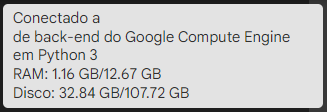

#<font color=lightgreen>Referências Bibliográficas

CORMEM, T. H., LEISERSON C. E., RIVEST R. L., STEIN C., Algoritmos Teoria e Prática – Gen LTC, 3ª Edição, 2012, ISBN-13: ‎ 978-8535236996

* ZIVIANI, N., Projetos de Algoritmos com Implementação e Java e C++, Cengage Learning, 2006

* Espaço do Conhecimento UFMG, Ada Lovelace: A Primeira Programadaora da História, 11 julho 2023, https://www.ufmg.br/espacodoconhecimento/ada-lovelace-a-primeira-programadora-da-historia/

* TAPES G., Por que a matemática é essencial para a programação?, https://www.tabnews.com.br/gabrielTapes/por-que-a-matematica-e-essencial-para-a-programacao

* FEOFILOFF, P. Minicurso de Análise de Algoritmos, 2010, http://www.ime.usp.br/~pf/livrinho-AA/

* GOODRICH M. T., TAMASSIA R., GOLDWASSER M. H., Data Structures and Algorithms in Python, 2013

* Growing with the web, Comb Sort, https://www.growingwiththeweb.com/2016/09/comb-sort.html

* Growing with the web, Cocktail sort, https://www.growingwiththeweb.com/2016/04/cocktail-sort.html

* Geeksforgeeks, Tim Sort, https://www.geeksforgeeks.org/timsort/

* Técnicas de Ordenação, Tim Sort Nativo Python, https://docs.python.org/pt-br/dev/howto/sorting.html

* Geeksforgeeks, Smooth Sort, https://www.geeksforgeeks.org/introduction-to-smooth-sort/?ref=header_outind

* Geeksforgeeks, Cartesian Tree Sort, https://www.geeksforgeeks.org/cartesian-tree-sorting/

* OI Wiki competitive programming, Tournament Sort, https://en.oi-wiki.org/basic/tournament-sort/

* Geeks for geeks, Pancake Sort, https://www.geeksforgeeks.org/pancake-sorting-in-python/

* Chat GPT, Método Twist Sort (Método de ordenação experiemntal que combina Quick Sort e Cocktail Sort)

* Geeks for Gueeks, Topological Sort, https://www.geeksforgeeks.org/python-program-for-topological-sorting/

* Stack Overflow, Topological Sorthttps://stackoverflow.com/questions/47192626/deceptively-simple-implementation-of-topological-sorting-in-python

* Geeks for Geeks, Topological Sort, https://www.geeksforgeeks.org/topological-sorting/

* PETERSEN F., Sorting Network, https://github.com/Felix-Petersen/diffsort/blob/main/diffsort/networks.py

* Stack Overflow, Batcher Odd-Even Merge Sort, https://stackoverflow.com/questions/33320414/optimal-batcher-odd-even-merge-networks-for-sizes-different-than-2n
